# Classification Approch

# تمامی دفترچه های لاجستیک بر روی کولب آموزش میبینند و مدل اماده اینحا درج میشود

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report,
ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay)
from sklearn.pipeline import Pipeline


#Grid Search
from sklearn.model_selection import GridSearchCV

#Model(s)
from sklearn.linear_model import LogisticRegression


## Work flow
0. [ ] Clean and Engeering Data for X and y
1. [ ] Split Data in Train/Test for X and y
2. [ ] Scaler on Training X & X test
3. [ ] Create Model(s)
4. [ ] Create Pipeline and HyperParameters
5. [ ] Fit/Train Model(s) on X Train
6. [ ] Evaluate Model(s) on X test
7. [ ] Adjust Param as Necessary
8. [ ] Bonus: Save Model(s)

In [2]:
filename = 'Logestic.pkl'

### PreProcess


In [5]:
names = ['wifi 1', 'wifi 2', 'wifi 3', 'wifi 4', 'wifi 5', 'wifi 6', 'wifi 7', 'room']
df= pd.read_csv('../wifi_localization.txt',names=names,sep='\t')
df

,wifi 1,wifi 2,wifi 3,wifi 4,wifi 5,wifi 6,wifi 7,room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


In [7]:
for col in names:
    print(df[col].info())
    print('\n****\n')

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: wifi 1
Non-Null Count  Dtype
--------------  -----
2000 non-null   int64
dtypes: int64(1)
memory usage: 15.8 KB
None

****

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: wifi 2
Non-Null Count  Dtype
--------------  -----
2000 non-null   int64
dtypes: int64(1)
memory usage: 15.8 KB
None

****

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: wifi 3
Non-Null Count  Dtype
--------------  -----
2000 non-null   int64
dtypes: int64(1)
memory usage: 15.8 KB
None

****

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: wifi 4
Non-Null Count  Dtype
--------------  -----
2000 non-null   int64
dtypes: int64(1)
memory usage: 15.8 KB
None

****

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: wifi 5
Non-Null Count  Dtype
--------------  -----
2000 non-null   int64
dtypes

#### Clean and Engeering Data
Clean data no need!

#### Split Data in Train/Test for X and y


In [9]:
X = df.drop(['room'], axis=1)
y = df['room']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1099, stratify = y)

### Model

poly = PolynomialFeatures()
log = LogisticRegression()

pipe = Pipeline([('poly', poly), ('log', log)])

#help(PolynomialFeatures)
help(LogisticRegression)

#hyper param values

#poly
degree = list(range(1,5))
include_bias = [True,False]

#log
penalty = ['l1', 'l2', None]
C = list(np.logspace(-1, 0, 5))
solver = ['lbfgs', 'liblinear', 'saga']
max_iter = [100, 200, 300, 400, 500, 750, 1000, ]
multi_class = ['auto', 'ovr', 'multinomial', ]
l1_ratio = list(np.logspace(-2, 0, 15))

hyp_param = {
    #poly
    'poly__degree':degree,
    'poly__include_bias': include_bias,
    #log
    'log__C': C,
    'log__l1_ratio': l1_ratio,
    'log__max_iter': max_iter,
    'log__multi_class': multi_class,
    'log__penalty': penalty,
    'log__solver': solver,
}

#### Create Model(s)

full_model = GridSearchCV(
    estimator=pipe,
    param_grid=hyp_param,
    cv=5,
    verbose=2
)

#### Train Model

full_model.fit(X_train,y_train)

### Evaluate model

y_pred = full_model.predict(X_test)

#### Test On data

ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_true=y_test,
                                     y_pred=y_pred),
    display_labels=full_model.classes_)

print(classification_report(y_true=y_test,
                           y_pred=y_pred))

### Final Model(s)


In [27]:
hyp_param={
    'log__C': 0.1,
    'log__l1_ratio': 0.01,
    'log__max_iter': 1000,
    'log__multi_class': 'multinomial',
    'log__penalty': 'l1',
    'log__solver': 'saga',
    'poly__degree': 1}

In [30]:
final = LogisticRegression(   
    C = 0.1,
    l1_ratio =  0.01,
    max_iter = 1000,
    multi_class= 'multinomial',
    penalty =  'l1',
    solver = 'saga',)

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


              precision    recall  f1-score   support

           1       1.00      0.98      0.99       165
           2       0.99      0.96      0.97       165
           3       0.94      0.98      0.96       165
           4       0.99      0.99      0.99       165

    accuracy                           0.98       660
   macro avg       0.98      0.98      0.98       660
weighted avg       0.98      0.98      0.98       660



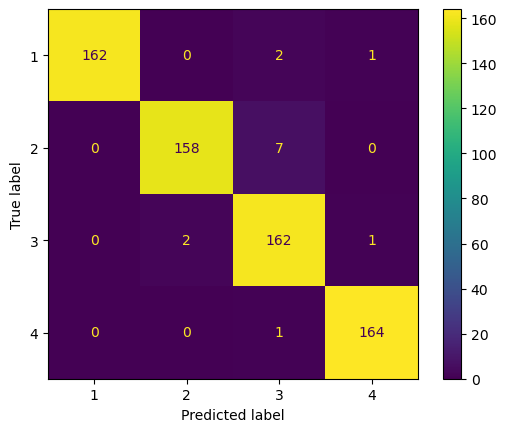

In [31]:
# فقط برای نمایش نتیجه
final.fit(X_train,y_train)
y_pred = final.predict(X_test)

ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_true=y_test,
                                     y_pred=y_pred),
    display_labels=final.classes_).plot()
print(classification_report(y_true=y_test,
                           y_pred=y_pred))

#### Train on all Data 

In [32]:
final.fit(X,y)

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


LogisticRegression(C=0.1, l1_ratio=0.01, max_iter=1000,
                   multi_class='multinomial', penalty='l1', solver='saga')

#### Save with joblib

In [33]:
import joblib
joblib.dump(value=final,filename='logistic.pkl')

['logistic.pkl']

# Congratulations!!!

#### Created and trained by  Matin1099.
